This will be a covid 19 data analysis project

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

I will be using the covid 19 data general data that has all the countries affected by covid 19. My analysis will be based on the top countries that were affected and the origin state in mainland China. I will also analyse the spread of covid in the years 2020 and 2021

In [24]:
data = pd.read_csv('covid_19_data.csv')
timeseries_data = pd.read_csv('time_series_covid_19_confirmed.csv')
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [25]:
timeseries_data.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,1255,1255,1257,1257,1258,1258,1258,1258,1259,1259
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,3447044,3482512,3514683,3539484,3562135,3586736,3622135,3663215,3702422,3732263
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,221559,221699,221880,221948,221982,222139,222269,222409,222513,222555
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,124,124,124,124,124,124,124,124,124,124
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,5567,5568,5570,5572,5574,5576,5576,5579,5580,5585


In [15]:
mean_deaths = data['Deaths'].mean()
mean_recovered = data['Recovered'].mean()
mean_confirmed = data['Confirmed'].mean()


Okay, let's find the middle point for recovered cases, confirmed cases, and deaths. It'll help us see the bigger picture and understand things better.

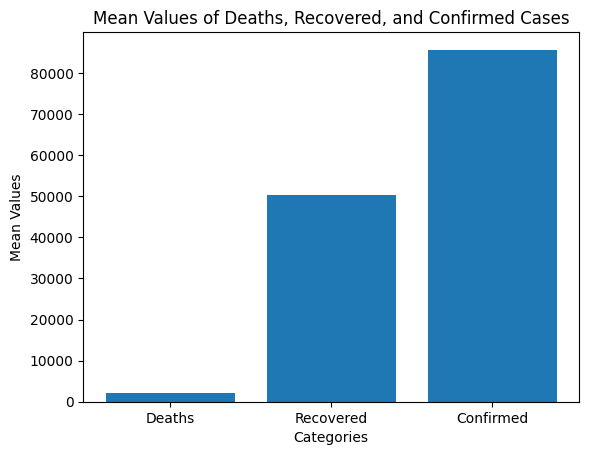

In [16]:
# Data for the bar plot
categories = ['Deaths', 'Recovered', 'Confirmed']
mean_values = [mean_deaths, mean_recovered, mean_confirmed]

# Create the bar plot
plt.bar(categories, mean_values)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Mean Values')
plt.title('Mean Values of Deaths, Recovered, and Confirmed Cases')

# Show the plot
plt.show()

Based on the above observation, it becomes evident that the overall mean of confirmed cases was relatively high. However, there's a silver lining to this data: the average number of deaths was lower than the number of recovered cases. This encouraging finding suggests that the pandemic was effectively managed and brought under control.
This data contains both 2020 and 2021 records.

In [26]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data['Last Update'] = pd.to_datetime(data['Last Update'])

In [51]:
data['Year'] = data['ObservationDate'].dt.year
data['Monthly'] = data['ObservationDate'].dt.month

Now we need to prepare the data for both 2020 and 2021 individually

In [54]:
data_2020 = data[data['Year'] == 2020]

In [55]:
data_2021 = data[data['Year'] == 2021]

In [57]:
monthly_data_2020 = data_2020.groupby(['Year', 'Monthly']).agg({
    'Deaths': 'sum',
    'Confirmed': 'sum',
    'Recovered': 'sum'
}).reset_index()


In [ ]:
monthly_data_2021 = data_2021.groupby(['Year', 'Monthly']).agg({
    'Deaths': 'sum',
    'Confirmed': 'sum',
    'Recovered': 'sum'
}).reset_index()

In [36]:
yearly_data = data.groupby(data['ObservationDate'].dt.year).agg({'Deaths':'sum','Confirmed':'sum','Recovered':'sum'})

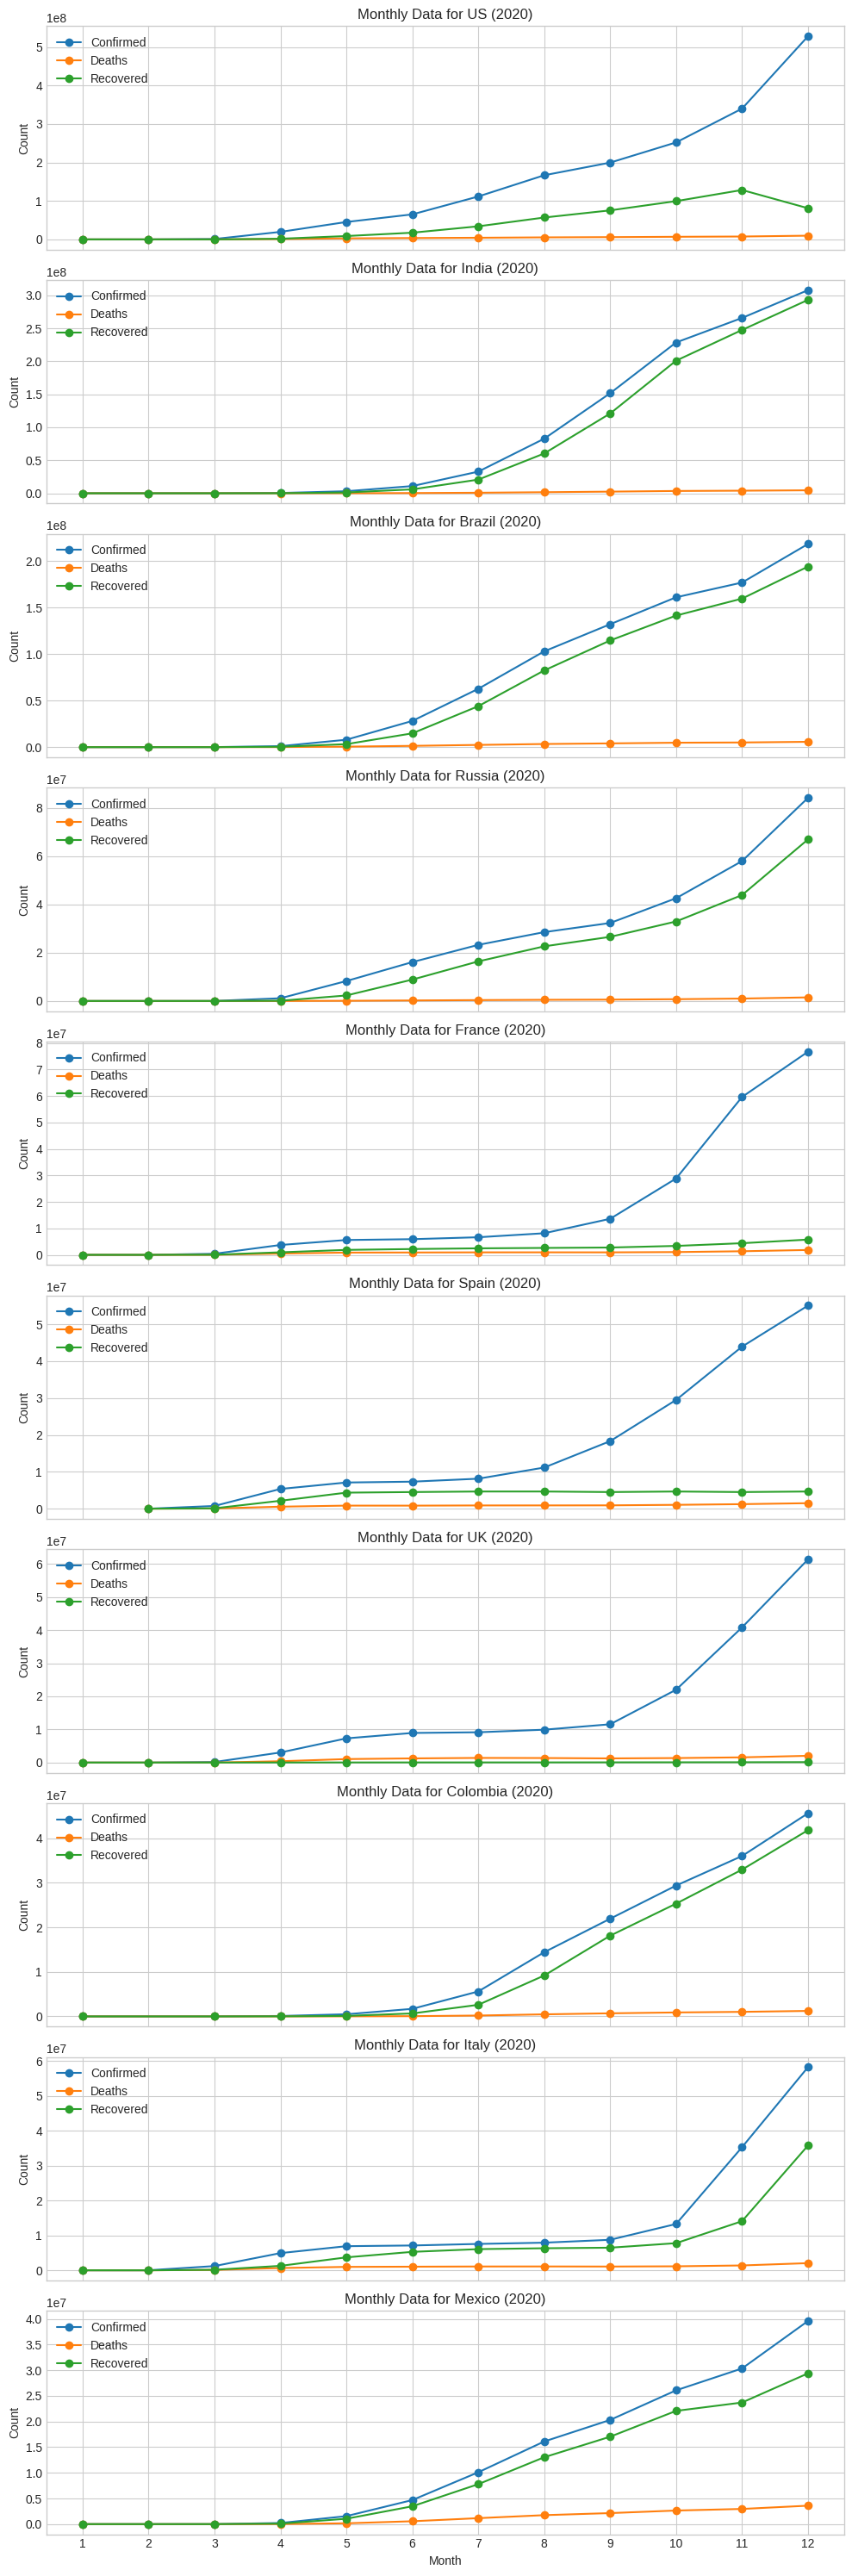

In [60]:
# Group by "Country/Region" and calculate the total confirmed cases in 2020
total_confirmed_2020 = data_2020.groupby('Country/Region')['Confirmed'].sum()

# Get the top 10 countries with the highest total confirmed cases in 2020
top_10_countries_2020 = total_confirmed_2020.nlargest(10).index.tolist()

# Filter data for the top 10 countries in 2020
data_top_10_countries = data_2020[data_2020['Country/Region'].isin(top_10_countries_2020)]

# Group by "Country/Region", year, and month and calculate the monthly total of confirmed, deaths, and recovered cases
monthly_data_top_10_countries = data_top_10_countries.groupby(['Country/Region', 'Year', 'Monthly']).agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Plotting the data
fig, axs = plt.subplots(len(top_10_countries_2020), 1, figsize=(10, 30), sharex=True)

for i, country in enumerate(top_10_countries_2020):
    country_data = monthly_data_top_10_countries[monthly_data_top_10_countries['Country/Region'] == country]
    axs[i].plot(country_data['Monthly'], country_data['Confirmed'], label='Confirmed', marker='o')
    axs[i].plot(country_data['Monthly'], country_data['Deaths'], label='Deaths', marker='o')
    axs[i].plot(country_data['Monthly'], country_data['Recovered'], label='Recovered', marker='o')
    axs[i].set_title(f'Monthly Data for {country} (2020)')
    axs[i].set_ylabel('Count')
    axs[i].grid(True)
    axs[i].legend()

axs[-1].set_xticks(range(1, 13))
axs[-1].set_xlabel('Month')
plt.tight_layout()
plt.show()

We can attest that in the year 2020, US was seriously struck with covid followed by India. But we can also see that the US, France, UK and Spain had less recovery compared with other countries like India. Although India has a high population, It managed to contain the disease

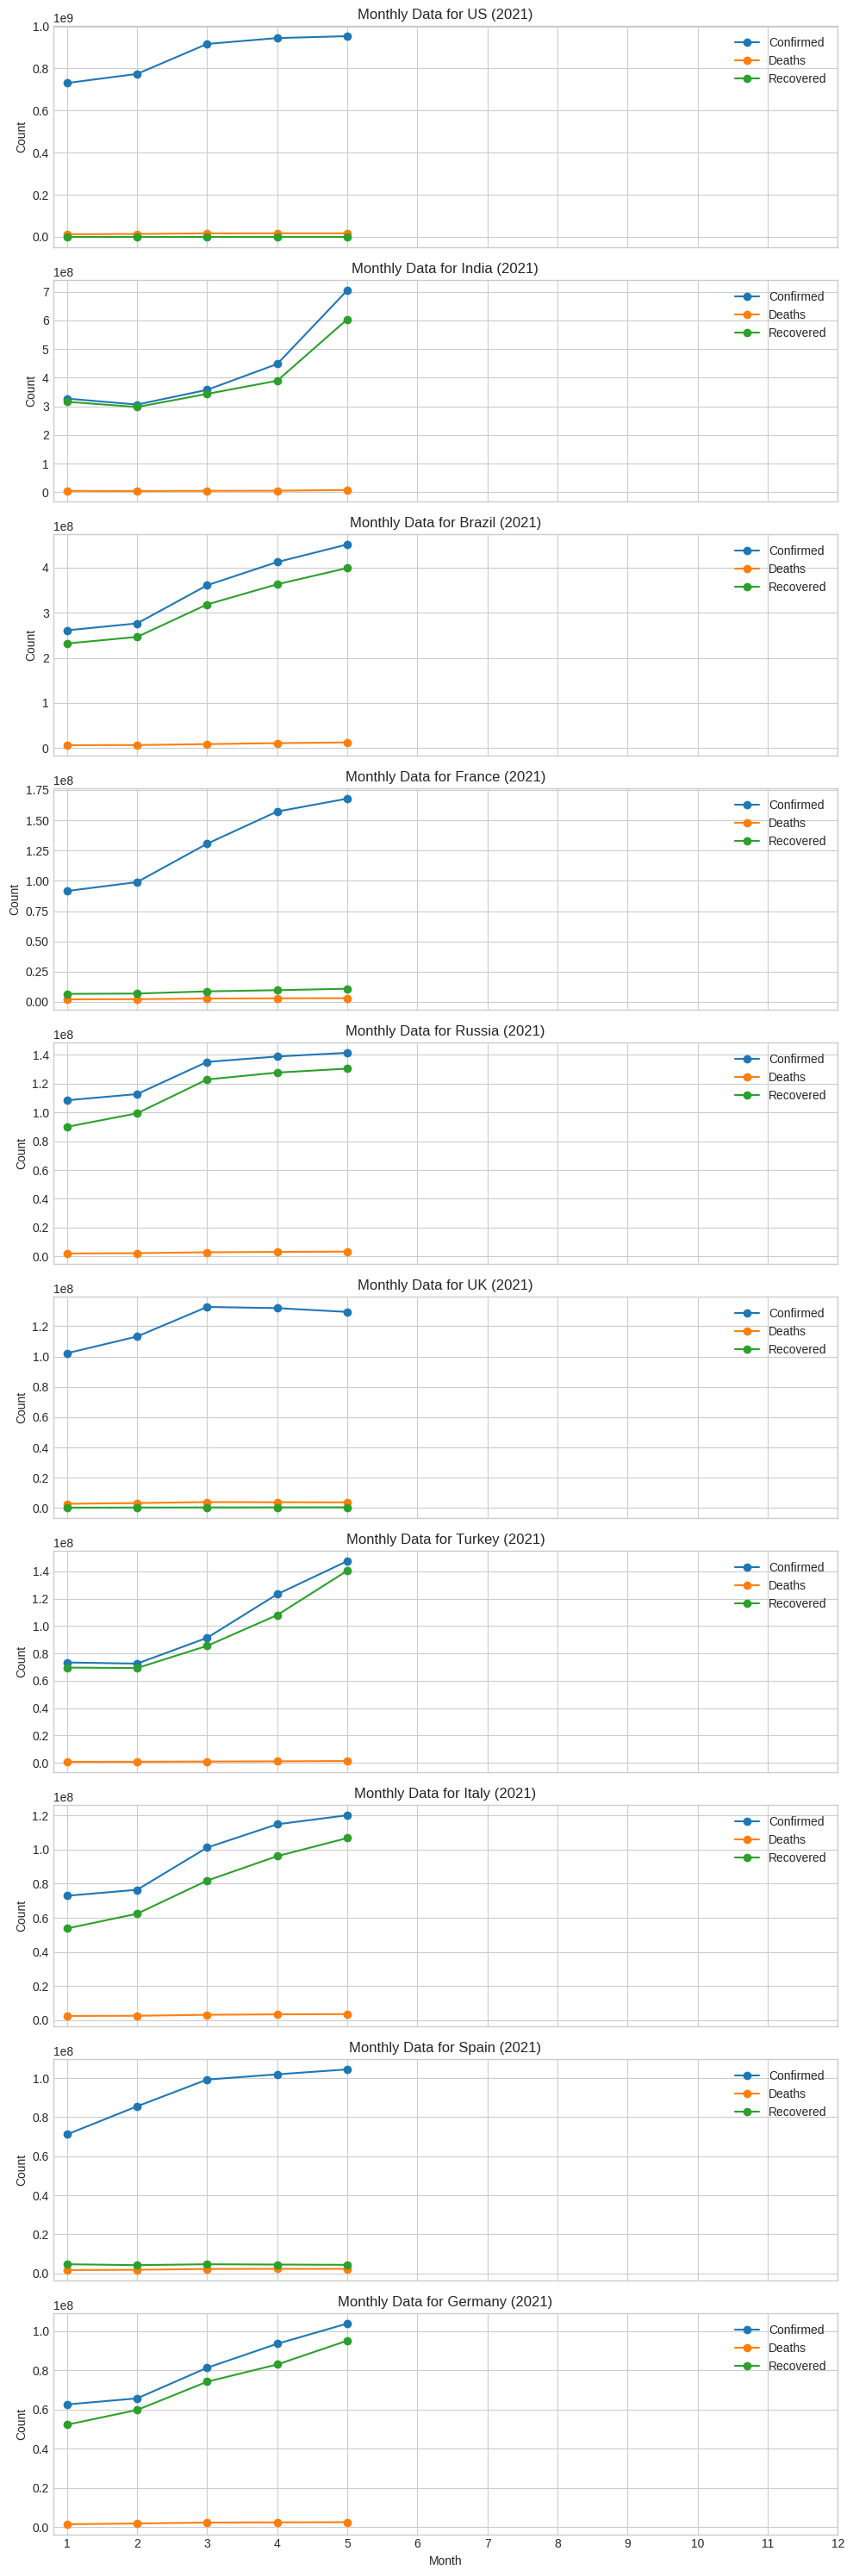

In [61]:
# Group by "Country/Region" and calculate the total confirmed cases in 2020
total_confirmed_2021 = data_2021.groupby('Country/Region')['Confirmed'].sum()

# Get the top 10 countries with the highest total confirmed cases in 2020
top_10_countries_2021 = total_confirmed_2021.nlargest(10).index.tolist()

# Filter data for the top 10 countries in 2020
data_top_10_countries = data_2021[data_2021['Country/Region'].isin(top_10_countries_2021)]

# Group by "Country/Region", year, and month and calculate the monthly total of confirmed, deaths, and recovered cases
monthly_data_top_10_countries = data_top_10_countries.groupby(['Country/Region', 'Year', 'Monthly']).agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Plotting the data
fig, axs = plt.subplots(len(top_10_countries_2021), 1, figsize=(10, 30), sharex=True)

for i, country in enumerate(top_10_countries_2021):
    country_data = monthly_data_top_10_countries[monthly_data_top_10_countries['Country/Region'] == country]
    axs[i].plot(country_data['Monthly'], country_data['Confirmed'], label='Confirmed', marker='o')
    axs[i].plot(country_data['Monthly'], country_data['Deaths'], label='Deaths', marker='o')
    axs[i].plot(country_data['Monthly'], country_data['Recovered'], label='Recovered', marker='o')
    axs[i].set_title(f'Monthly Data for {country} (2021)')
    axs[i].set_ylabel('Count')
    axs[i].grid(True)
    axs[i].legend()

axs[-1].set_xticks(range(1, 13))
axs[-1].set_xlabel('Month')
plt.tight_layout()
plt.show()

The year 2021 did not have much and from what we have is that the US still led in the higest number of confirmed cases. But still, their recovery rate was still low compared with other countries like India, which had the second highest number of cases.

In [62]:
# Group by "Country/Region" and calculate the total confirmed, recovered, and death cases for each year
cases_by_country_year = data.groupby(['Country/Region', 'Year']).agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Get the top 10 countries based on confirmed cases for the year 2020
top_10_countries_2020_confirmed = cases_by_country_year[cases_by_country_year['Year'] == 2020].nlargest(10, 'Confirmed')
top_10_countries_2020_recovered = cases_by_country_year[cases_by_country_year['Year'] == 2020].nlargest(10, 'Recovered')
top_10_countries_2020_deaths = cases_by_country_year[cases_by_country_year['Year'] == 2020].nlargest(10, 'Deaths')

# Get the top 10 countries based on confirmed cases for the year 2021
top_10_countries_2021_confirmed = cases_by_country_year[cases_by_country_year['Year'] == 2021].nlargest(10, 'Confirmed')
top_10_countries_2021_recovered = cases_by_country_year[cases_by_country_year['Year'] == 2021].nlargest(10, 'Recovered')
top_10_countries_2021_deaths = cases_by_country_year[cases_by_country_year['Year'] == 2021].nlargest(10, 'Deaths')


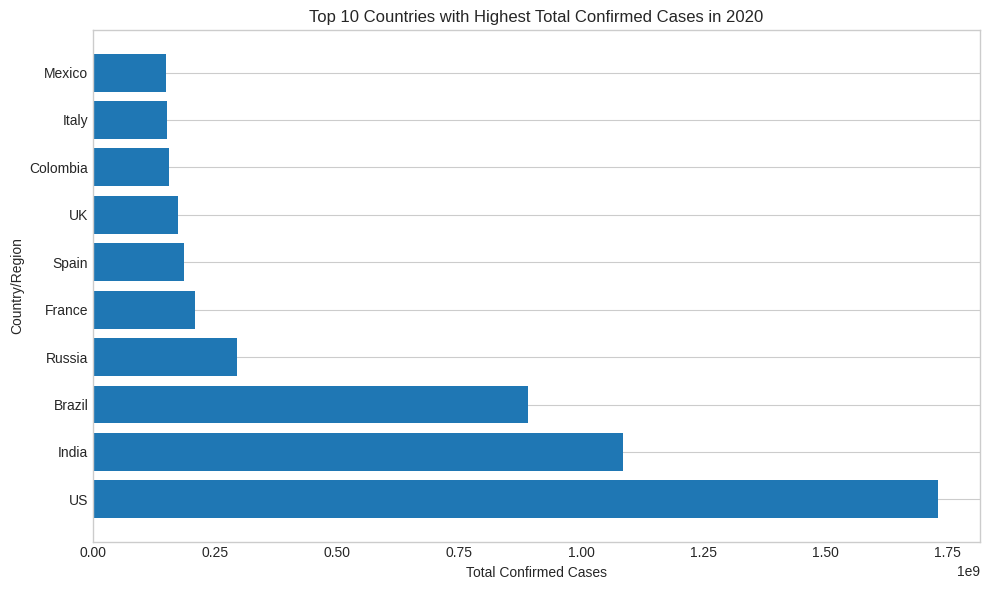

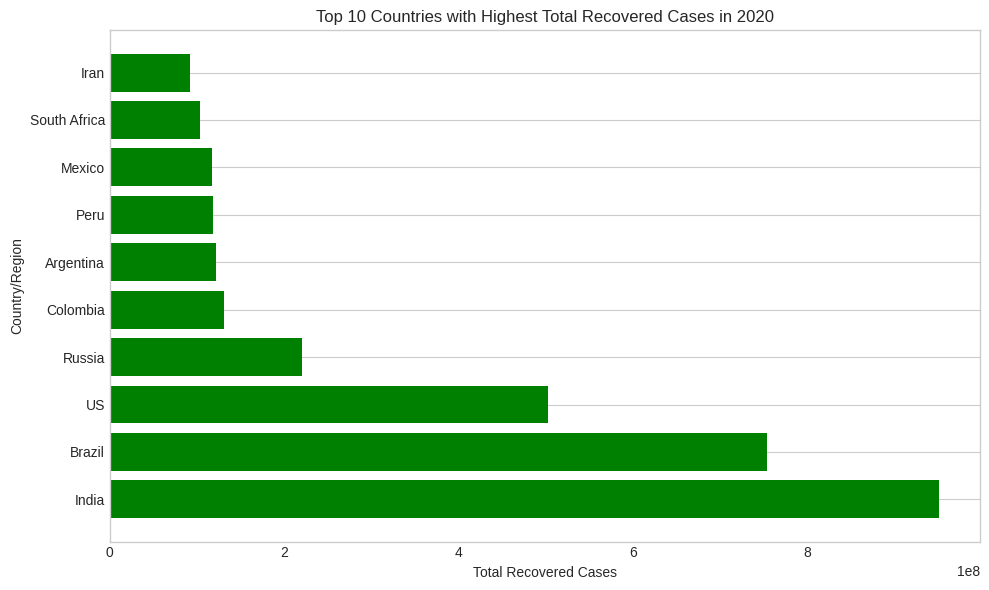

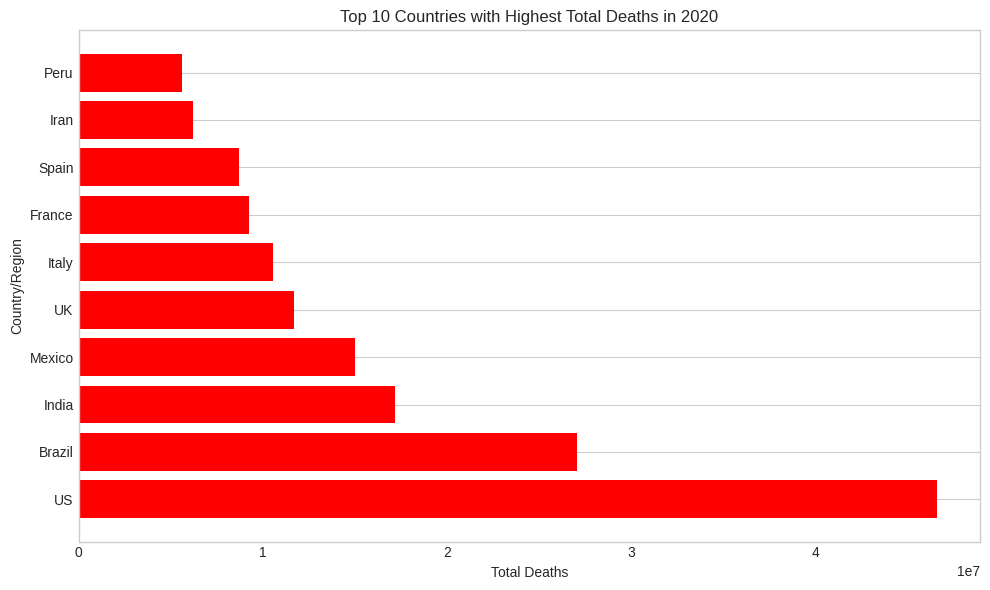

In [64]:
# Plotting the data for 2020 (Confirmed)
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries_2020_confirmed['Country/Region'], top_10_countries_2020_confirmed['Confirmed'])
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country/Region')
plt.title('Top 10 Countries with Highest Total Confirmed Cases in 2020')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Plotting the data for 2020 (Recovered)
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries_2020_recovered['Country/Region'], top_10_countries_2020_recovered['Recovered'], color='green')
plt.xlabel('Total Recovered Cases')
plt.ylabel('Country/Region')
plt.title('Top 10 Countries with Highest Total Recovered Cases in 2020')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Plotting the data for 2020 (Deaths)
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries_2020_deaths['Country/Region'], top_10_countries_2020_deaths['Deaths'], color='red')
plt.xlabel('Total Deaths')
plt.ylabel('Country/Region')
plt.title('Top 10 Countries with Highest Total Deaths in 2020')
plt.grid(axis='x')
plt.tight_layout()
plt.show()



This is the same data as above but now we can see using a bar graph how covid spread compared with other countries

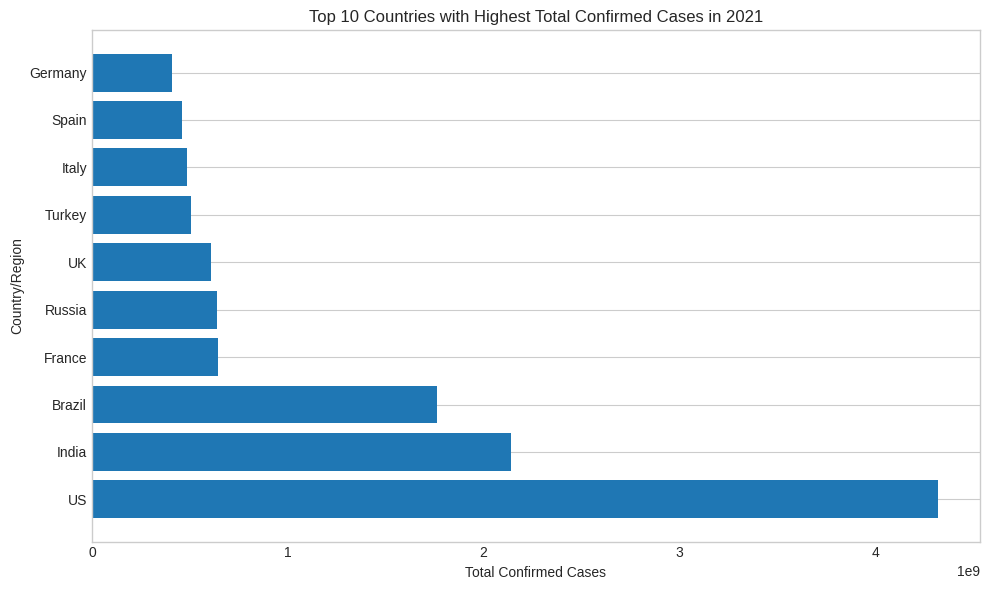

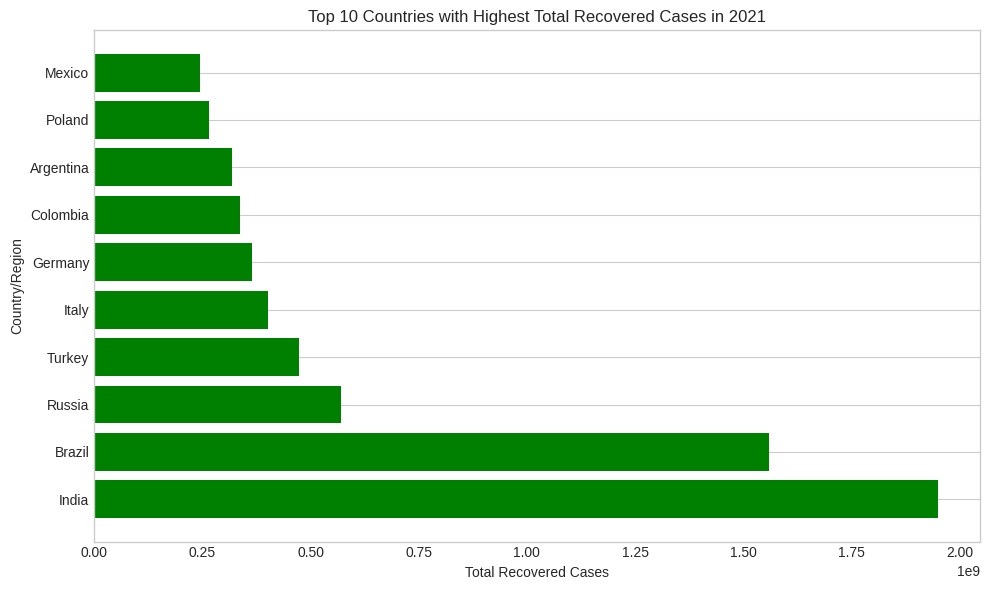

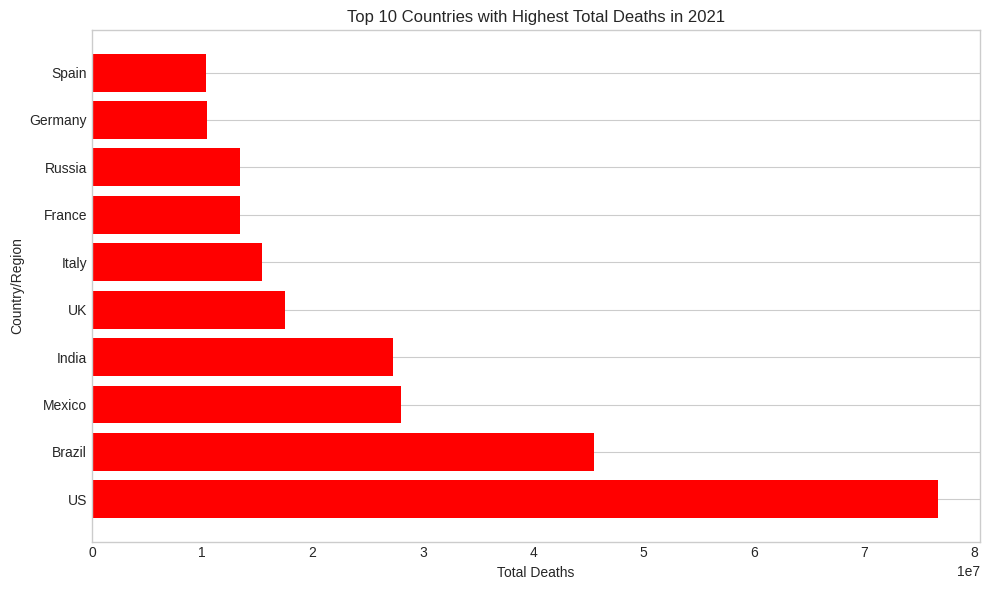

In [65]:

# Plotting the data for 2021 (Confirmed)
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries_2021_confirmed['Country/Region'], top_10_countries_2021_confirmed['Confirmed'])
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country/Region')
plt.title('Top 10 Countries with Highest Total Confirmed Cases in 2021')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Plotting the data for 2021 (Recovered)
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries_2021_recovered['Country/Region'], top_10_countries_2021_recovered['Recovered'], color='green')
plt.xlabel('Total Recovered Cases')
plt.ylabel('Country/Region')
plt.title('Top 10 Countries with Highest Total Recovered Cases in 2021')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Plotting the data for 2021 (Deaths)
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries_2021_deaths['Country/Region'], top_10_countries_2021_deaths['Deaths'], color='red')
plt.xlabel('Total Deaths')
plt.ylabel('Country/Region')
plt.title('Top 10 Countries with Highest Total Deaths in 2021')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

This is the same data as above but now we can see using a bar graph how covid spread compared with other countries

In [18]:
average_data = data.groupby('Country/Region').agg({'Deaths': 'mean', 'Confirmed': 'mean', 'Recovered': 'mean'})

In [19]:
average_data.head()

,Deaths,Confirmed,Recovered
Country/Region,,,
Azerbaijan,0.000000,1.000000,0.000000
"('St. Martin',)",0.000000,2.000000,0.000000
Afghanistan,1451.355748,36933.713666,29206.939262
Albania,841.062640,44225.657718,31197.440716
Algeria,1814.052174,60183.386957,41215.867391


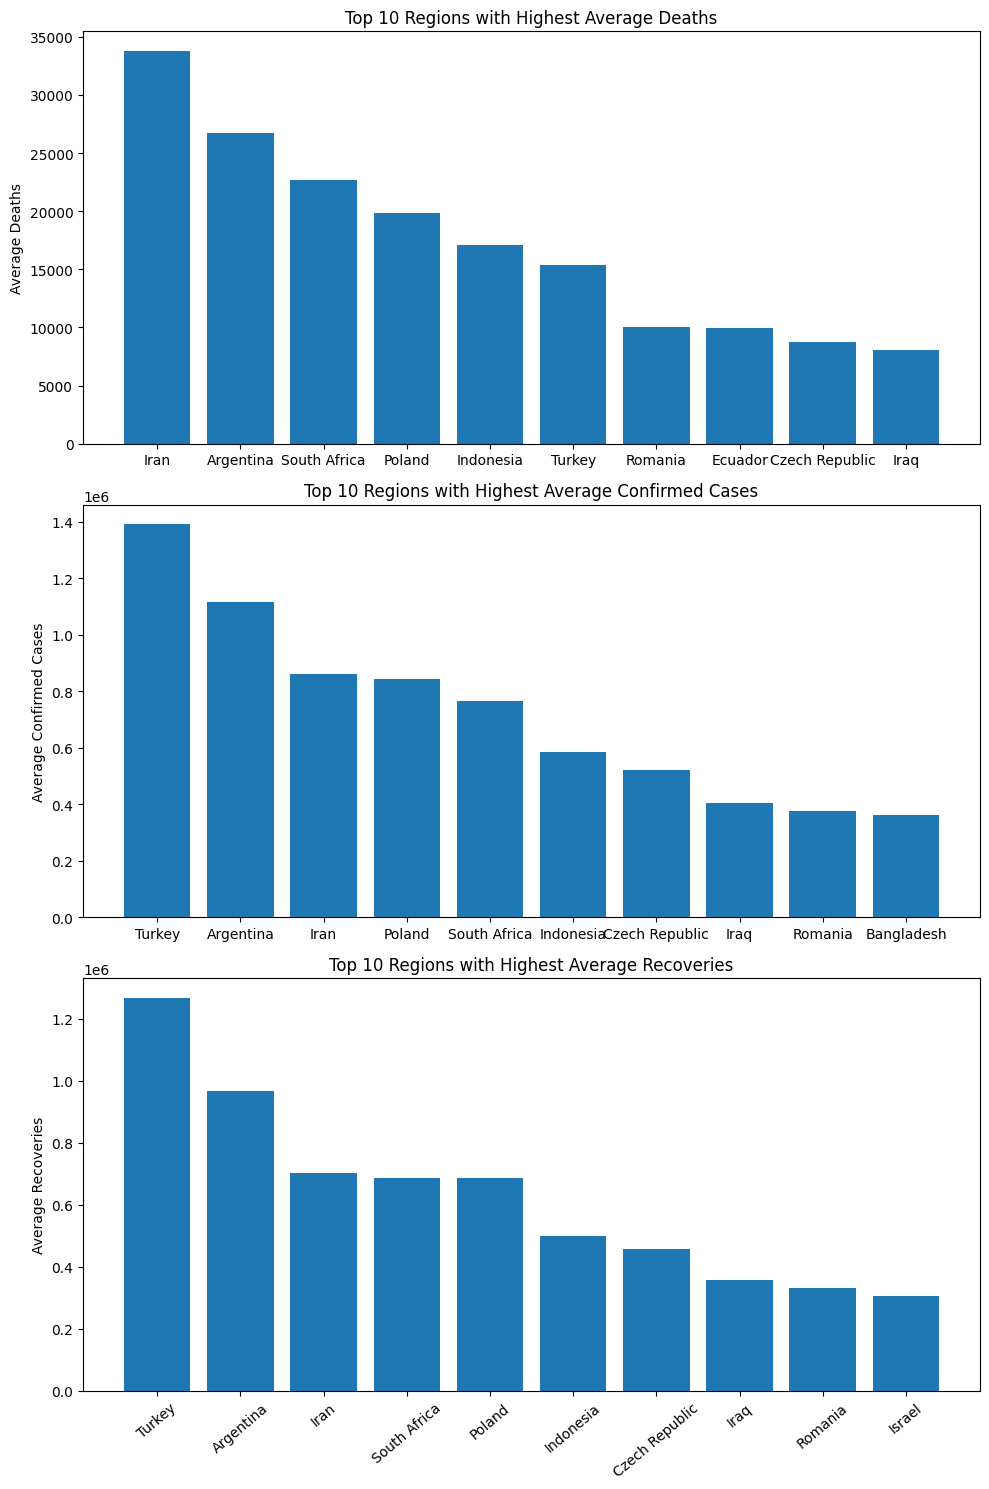

In [20]:
# Sort by each category and get the top 10 regions
top_10_deaths = average_data.nlargest(10, 'Deaths')
top_10_confirmed = average_data.nlargest(10, 'Confirmed')
top_10_recoveries = average_data.nlargest(10, 'Recovered')

# Create subplots for each category
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot the top 10 regions with the highest average deaths
axs[0].bar(top_10_deaths.index, top_10_deaths['Deaths'])
axs[0].set_title('Top 10 Regions with Highest Average Deaths')
axs[0].set_ylabel('Average Deaths')

# Plot the top 10 regions with the highest average confirmed cases
axs[1].bar(top_10_confirmed.index, top_10_confirmed['Confirmed'])
axs[1].set_title('Top 10 Regions with Highest Average Confirmed Cases')
axs[1].set_ylabel('Average Confirmed Cases')

# Plot the top 10 regions with the highest average recoveries
axs[2].bar(top_10_recoveries.index, top_10_recoveries['Recovered'])
axs[2].set_title('Top 10 Regions with Highest Average Recoveries')
axs[2].set_ylabel('Average Recoveries')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=40)

plt.tight_layout()
plt.show()


Let's generalize our findings now. we can see the average deaths, recoveries and confirmed cases in the top 10 countries. From our findings, We can conclude that Iran had the most deaths on average. This could be attributed to poor healthcare services. On the other hand, Turkey had the most confirmed cases compared to Iran but managed to have the most recoveries in general. We can conlude that Turkey did the most to contain the disease and the results were quite impressive

In [21]:
#Mainland china data
mainland_china_data = data[data['Country/Region'] == 'Mainland China']

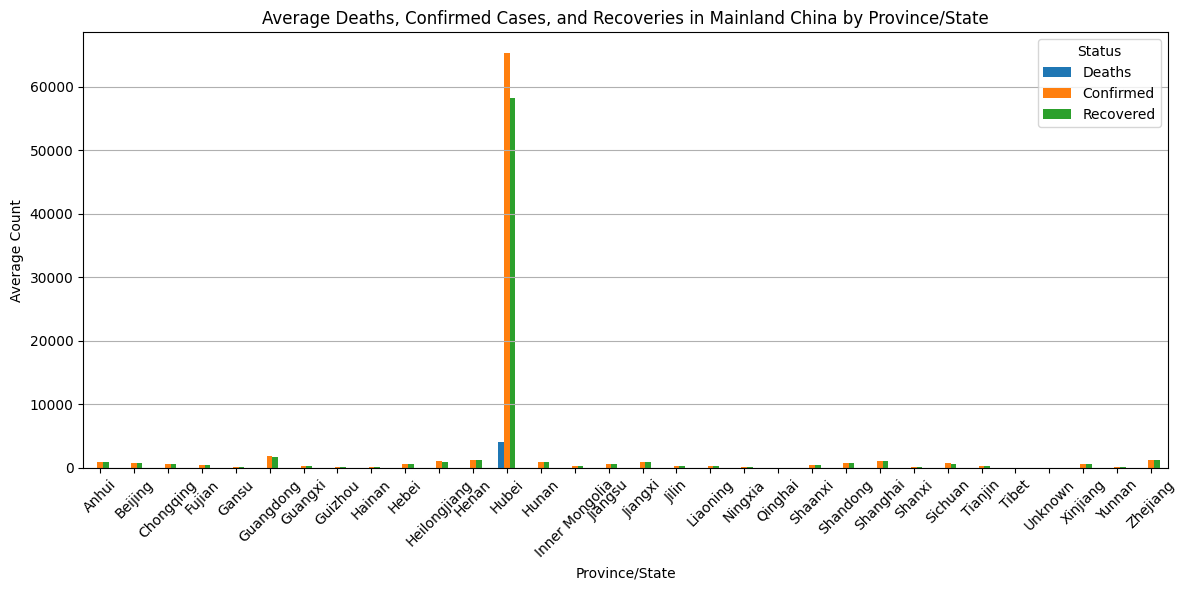

In [22]:
average_data = mainland_china_data.groupby('Province/State').agg({'Deaths': 'mean', 'Confirmed': 'mean', 'Recovered': 'mean'})

# Plotting the data as a bar plot
average_data.plot(kind='bar', figsize=(12, 6))
plt.title('Average Deaths, Confirmed Cases, and Recoveries in Mainland China by Province/State')
plt.xlabel('Province/State')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend(title='Status', loc='upper right', labels=['Deaths', 'Confirmed', 'Recovered'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Let's dive a little deeper into the data and discover some interesting insights! Among all the provinces in Mainland China, Hubei emerged with the highest numbers of confirmed cases, deaths, and recoveries. While this might indicate that the virus might have originated there or had a significant impact on the province, it also means that Hubei was at the forefront of facing the challenges posed by COVID-19.

Recognizing the importance of Hubei's situation, we could have seen it as an opportunity to focus our efforts on providing the necessary support and resources to help those affected. 